In [41]:
import time, datetime
import numpy as np
from numpy import zeros, sqrt, pi, vectorize
from numpy.linalg import pinv, inv
from multiprocessing import Process, Queue
#import matplotlib
#matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
from error_analysis_class import *
from noshellavg import *
from matplotlib.backends.backend_pdf import PdfPages
from run_error_analysis import *
from plot_error import *
import sys
import argparse
import yaml
from utils import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
param_file = 'yaml/test_bfsn_k0_02_kN500_r18_180_rN162.yaml'
params = yaml.load(open(param_file))
kmin, kmax, kN = params['k']
rmin, rmax, rN = params['r']
logscale = params['logscale']
KMIN, KMAX = 1e-3, 2.0
lmax = params['lmax']
parameter_ind = params['parameter_ind']   

b = 2.0
if 'b' in params: b = params['b']
f = 0.74
if 'f' in params: f = params['f']
s = 3.5
if 's' in params: s = params['s']
nn = 3.0 * 10**(-4) #1/n
if 'nn' in params: nn = params['nn']

RSDPower = NoShell_covariance(KMIN, KMAX, rmin, rmax, 2**10 + 1, rN, 1, kN, b,f,s,nn,logscale = logscale)

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1025, N_y = 200, rN = 163
dr = 1.0, dk=0.0019521484375, dk_y=0.0100452261307


In [95]:
covPP = np.genfromtxt('data_txt/cov/test_bfsn_k0_02_kN500_r18_180_rN162_PP.cov')
covXi = np.genfromtxt('data_txt/cov/test_bfsn_k0_02_kN500_r18_180_rN162_Xi.cov')
covPXi = np.genfromtxt('data_txt/cov/test_bfsn_k0_02_kN500_r18_180_rN162_PXi.cov')
params_datav_p = np.genfromtxt('data_txt/datav/test_bfsn_k0_02_kN500_r18_180_rN162_params.datavector')
params_datav_xi = np.genfromtxt('data_txt/datav/test_bfsn_k0_02_kN500_r18_180_rN162_params_xi.datavector')

covPP_masked = masking(RSDPower, covPP, kmin=kmin, kmax=kmax, lmax=lmax)
covXi = masking(RSDPower, covXi, xi=True, lmax=lmax)
covPXi = masking(RSDPower, covPXi, kmin = kmin, kmax = kmax, lmax=lmax)
params_datav_p_mar = np.vstack(([ params_datav_p[p,:] for p in parameter_ind] ))
params_datav_xi_mar = np.vstack(([ params_datav_xi[p,:] for p in parameter_ind] ))

params_datav_p_mar_kcut = masking_paramsdatav(RSDPower, params_datav_p_mar, kmin=kmin, kmax=kmax, lmax=lmax)
params_datav_xi_mar = masking_paramsdatav(RSDPower, params_datav_xi_mar, xi=True, lmax=lmax)

In [96]:
# Fisher
cut = RSDPower.kcenter_y.size
covPPlist = [covPP[:cut, :cut], covPP[:cut, cut:2*cut], covPP[:cut, 2*cut:],
            covPP[:cut, cut:2*cut], covPP[cut:2*cut, cut:2*cut], covPP[cut:2*cut, 2*cut:], 
            covPP[:cut, 2*cut:], covPP[cut:2*cut, 2*cut:], covPP[2*cut:, 2*cut:]]
FisherP = masking(RSDPower, DiagonalBlockwiseInversion3x3(*tuple(covPPlist)), kmin=kmin, kmax=kmax, lmax=lmax)


In [98]:
FisherP.shape, covPP_masked.shape

((60, 60), (60, 60))

In [90]:
params_datav_xi_mar.shape

(4, 486)

In [ ]:
covPXi

In [13]:
params_fisher7x7 = np.genfromtxt('data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_7x7.txt')[:,1].reshape(7,7)
params_f_p = np.genfromtxt('data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt')[:,1].reshape(4,4)
params_f_xi = np.genfromtxt('data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt')[:,2].reshape(4,4)
params_f_tot = np.genfromtxt('data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt')[:,3].reshape(4,4)

printout_matrix_component(inv(params_fisher7x7)[:4,:4] )
printout_matrix_component(inv(params_f_p))


[  3.167e-05  -6.119e-05  -1.007e-03  -8.809e-02]
[  -6.119e-05  2.032e-04  3.172e-03  1.694e-01]
[  -1.007e-03  3.172e-03  6.635e-02  3.647e+00]
[  -8.809e-02  1.694e-01  3.647e+00  3.298e+02]

[  9.464e-05  -1.588e-04  -4.713e-03  -5.315e-01]
[  -1.588e-04  4.802e-04  1.386e-02  8.579e-01]
[  -4.713e-03  1.386e-02  4.953e-01  3.071e+01]
[  -5.315e-01  8.579e-01  3.071e+01  3.571e+03]


In [42]:
params_fisher7x7 = np.genfromtxt('data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_7x7.txt')[:,1].reshape(8,8)
params_f_p = np.genfromtxt('data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt')[:,1].reshape(4,4)
params_f_xi = np.genfromtxt('data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt')[:,2].reshape(4,4)
params_f_tot = np.genfromtxt('data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt')[:,3].reshape(4,4)

printout_matrix_component(inv(params_fisher7x7[:7,:7])[:4,:4] )
printout_matrix_component(inv(params_f_p))


[  3.167e-05  -6.119e-05  -1.007e-03  -8.809e-02]
[  -6.119e-05  2.032e-04  3.172e-03  1.694e-01]
[  -1.007e-03  3.172e-03  6.635e-02  3.647e+00]
[  -8.809e-02  1.694e-01  3.647e+00  3.298e+02]

[  9.464e-05  -1.588e-04  -4.713e-03  -5.315e-01]
[  -1.588e-04  4.802e-04  1.386e-02  8.579e-01]
[  -4.713e-03  1.386e-02  4.953e-01  3.071e+01]
[  -5.315e-01  8.579e-01  3.071e+01  3.571e+03]


In [280]:
params_fisher7x7 = np.genfromtxt('data_txt/test_b_k0_02_kN500_r18_180_rN162_fisher_params_7x7.txt')[:,1].reshape(2,2)
params_f_p = np.genfromtxt('data_txt/test_b_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt')[1]
params_f_xi = np.genfromtxt('data_txt/test_b_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt')[2]
params_f_tot = np.genfromtxt('data_txt/test_b_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt')[3]

print np.sum(params_fisher7x7), params_f_tot

printout_matrix_component(params_fisher7x7)
printout_matrix_component(inv(params_fisher7x7))
print 1./params_f_p, 1./params_f_xi, 1./params_f_tot



19597.9660161 19597.9660161

[  1.144e+06  -1.131e+06]
[  -1.131e+06  1.139e+06]

[  5.115e-05  5.082e-05]
[  5.082e-05  5.137e-05]
6.30541146839e-05 0.000353083545156 5.10257033397e-05


In [26]:
params_fisher7x7

array([[  1.05750181e+07,   5.73651076e+06,  -9.66977409e+03,
         -1.55473577e+01,  -1.05465027e+07,  -5.73747286e+06,
          1.25760740e+04,   0.00000000e+00],
       [  5.73651076e+06,   1.67195801e+07,  -1.40399259e+05,
         -2.18783183e+00,  -5.68448146e+06,  -1.66899736e+07,
          1.40911155e+05,   0.00000000e+00],
       [ -9.66977409e+03,  -1.40399259e+05,   1.93655956e+03,
         -1.83254526e+00,   5.16039615e+03,   1.37916806e+05,
         -1.76692350e+03,   0.00000000e+00],
       [ -1.55473577e+01,  -2.18783183e+00,  -1.83254526e+00,
          2.81356886e-02,   8.63032512e+01,   2.32882773e+01,
          3.20995510e-01,   0.00000000e+00],
       [ -1.05465027e+07,  -5.68448146e+06,   5.16039615e+03,
          8.63032512e+01,   1.07748982e+07,   5.75787592e+06,
         -1.15746144e+04,   0.00000000e+00],
       [ -5.73747286e+06,  -1.66899736e+07,   1.37916806e+05,
          2.32882773e+01,   5.75787592e+06,   1.67008642e+07,
         -1.40461179e+05,   0.0


[  1.670e-05  -1.506e-05  -4.833e-05  -3.356e-02]
[  -1.506e-05  5.782e-05  1.337e-04  2.645e-03]
[  -4.833e-05  1.337e-04  2.347e-03  1.625e-01]
[  -3.356e-02  2.645e-03  1.625e-01  1.285e+02]

[  1.562e-05  -3.131e-05  -1.429e-04]
[  -3.131e-05  2.752e-04  6.540e-03]
[  -1.429e-04  6.540e-03  2.344e-01]


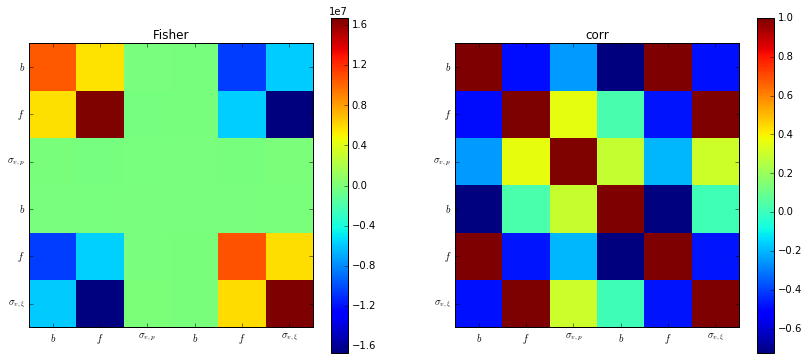

In [39]:
params_fisher7x7 = np.genfromtxt('data_txt/test_bfs_k0_02_kN500_r18_180_rN162_fisher_params_7x7.txt')[:,1].reshape(8,8)
params_f_p = np.genfromtxt('data_txt/test_bfs_k0_02_kN500_r18_180_rN162_fisher_params.txt')[:,1].reshape(3,3)
params_f_xi = np.genfromtxt('data_txt/test_bfs_k0_02_kN500_r18_180_rN162_fisher_params.txt')[:,2].reshape(3,3)
params_f_tot = np.genfromtxt('data_txt/test_bfs_k0_02_kN500_r18_180_rN162_fisher_params.txt')[:,3].reshape(3,3)

printout_matrix_component(inv(params_fisher7x7[:6,:6])[:4,:4] )
printout_matrix_component(inv(params_f_p))
plot_fisher_corr_matrix(params_fisher7x7[:6,:6], labels = [r'$b$', r'$f$', r'$\sigma_{v,p}$', r'$b$', r'$f$', r'$\sigma_{v,\xi}$'])


[  4.202e-06  -6.508e-06  2.105e-05  -5.952e-05]
[  -6.508e-06  5.602e-05  3.183e-04  3.239e-04]
[  2.105e-05  3.183e-04  4.938e-03  3.723e-03]
[  -5.952e-05  3.239e-04  3.723e-03  3.781e-02]

[  4.198e-06  -6.505e-06  2.102e-05  -5.948e-05]
[  -6.505e-06  5.591e-05  3.176e-04  3.234e-04]
[  2.102e-05  3.176e-04  4.932e-03  3.720e-03]
[  -5.948e-05  3.234e-04  3.720e-03  3.781e-02]


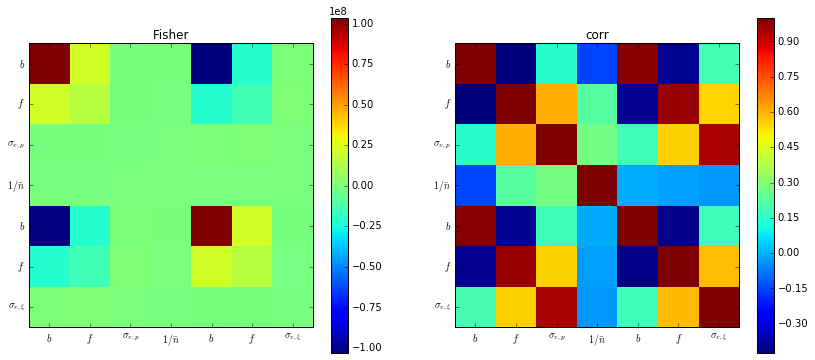

In [38]:
params_fisher7x7 = np.genfromtxt('data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params_7x7.txt')[:,1].reshape(7,7)
params_f_p = np.genfromtxt('data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params.txt')[:,1].reshape(4,4)
params_f_xi = np.genfromtxt('data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params.txt')[:,2].reshape(4,4)
params_f_tot = np.genfromtxt('data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params.txt')[:,3].reshape(4,4)

printout_matrix_component(inv(params_fisher7x7)[:4,:4] )
printout_matrix_component(inv(params_f_p))
plot_fisher_corr_matrix(params_fisher7x7)


[  6.143e-04  -1.141e-03  -1.132e-01  -1.017e+01]
[  -1.141e-03  2.690e-03  2.711e-01  1.730e+01]
[  -1.132e-01  2.711e-01  3.234e+01  1.903e+03]
[  -1.017e+01  1.730e+01  1.903e+03  1.873e+05]

[  7.318e-04  -1.045e-03  -1.000e-01  -1.169e+01]
[  -1.045e-03  2.839e-03  2.823e-01  1.576e+01]
[  -1.000e-01  2.823e-01  3.388e+01  1.728e+03]
[  -1.169e+01  1.576e+01  1.728e+03  2.093e+05]


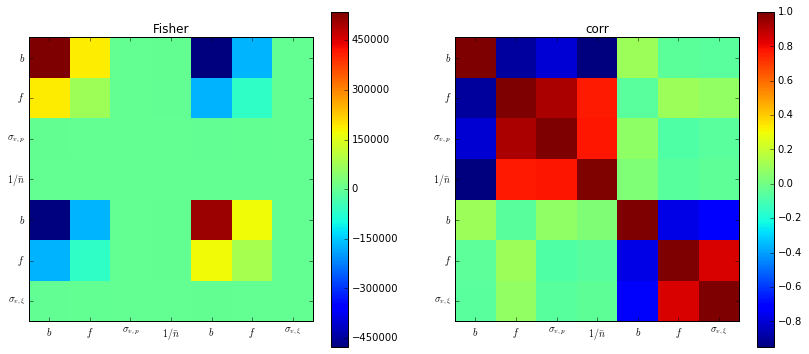

In [49]:
params_fisher7x7 = np.genfromtxt('data_txt/test_bfs_k0_01_kN500_r10_30_rN31_fisher_params_7x7.txt')[:,1].reshape(8,8)
params_f_p = np.genfromtxt('data_txt/test_bfs_k0_01_kN500_r10_30_rN31_fisher_params_nn.txt')[:,1].reshape(4,4)
params_f_xi = np.genfromtxt('data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params.txt')[:,2].reshape(4,4)
params_f_tot = np.genfromtxt('data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params.txt')[:,3].reshape(4,4)

printout_matrix_component(inv(params_fisher7x7[:7,:7] )[:4,:4] )
printout_matrix_component(inv(params_f_p))
plot_fisher_corr_matrix(params_fisher7x7[:7,:7])

fig save to  figure/test.png


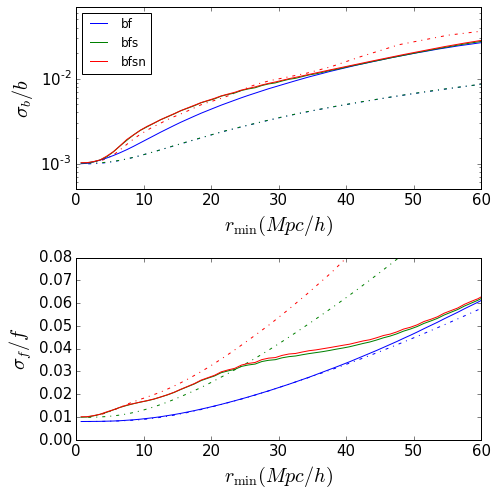

In [432]:
filename = ['data_txt/reid/default_kN500_ke-3_rN180_re-3_bf_reid_p.txt',
            'data_txt/reid/default_kN500_ke-3_rN180_re-3_bfs_reid_p.txt',
            'data_txt/reid/default_kN500_ke-3_rN180_re-3_bfsn_reid_p.txt',
            'data_txt/reid/default_kN500_ke-3_rN180_re-3_bf_reid_xi.txt',
            'data_txt/reid/default_kN500_ke-3_rN180_re-3_bfs_reid_xi.txt',
            'data_txt/reid/default_kN500_ke-3_rN180_re-3_bfsn_reid_xi.txt'
            ]
kind = [1, 1,1,0,0,0]
labels = ['', '', '','bf', 'bfs', 'bfsn']
color = ['blue', 'green', 'red', 'blue', 'green', 'red']
plot_reid(filename = filename, labels =labels, kind = kind, color=color, out_name = 'figure/test.png')

               b_p     f_p     b_xi     f_xi     joint    joint2
----------------------------------------------------------------
default       2.024    7.291    -       -       2.022   7.264   1.433   5.167
default       -        -       2.029   7.323   2.022   7.264
----------------------------------------------------------------
default       2.048    7.478    -       -       2.047   7.472   1.448   5.289
default       -        -       2.048   7.481   2.047   7.472
----------------------------------------------------------------
test          3.958    9.673    -       -       2.806   7.063   3.292   6.932
test          -        -       7.831   9.945   2.806   7.063
----------------------------------------------------------------
test          3.970    16.676    -       -       2.810   10.601   3.324   11.296
test          -        -       10.400   19.220   2.810   10.601
----------------------------------------------------------------
test          nan    nan    -       -       1.44

plot_error.py:348: RuntimeWarning: invalid value encountered in sqrt
  try : sigma_b[j][i], sigma_f[j][i], sigma_v[j][i] = np.sqrt(C[0,0]), np.sqrt(C[1,1]), np.sqrt(C[2,2])
plot_error.py:357: RuntimeWarning: invalid value encountered in sqrt
  sigma_n[j][i] = np.sqrt(C[3,3])


fig save to  figure/errorbar_bfsn.png


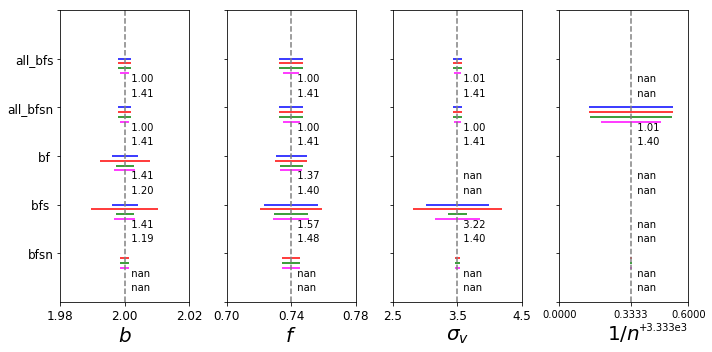

In [95]:
labels = ['all_bfs',
          'all_bfsn',
          'bf ',
          'bfs ',
          'bfsn'
         ]

filenames = ['data_txt/default_kN500_ke-3_rN180_re-3_bfs_fisher_params.txt',
             'data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params.txt',
             'data_txt/test_bf_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt',
             'data_txt/test_bfs_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt',
             'data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt'
              ]

plot_errbar(filename = filenames, labels = labels, out_name='figure/errorbar_bfsn.png', nn=1)


titles = [['all scales', 'all scales'], ['Greib et al. (2016)', 'Sanchez et al. (2016)'],
         ['Greib et al. (2016)', 'Satpathy et al. (2016)'], ['test scales', 'Sanchez et al. (2016)']]
ranges = [['0 < k < 2','0 < r < 200'], ['0 < k < 0.25','20 < r < 160'],
         ['0 < k < 0.25','25 < r < 150'], ['0 < k < 0.2','20 < r < 160']]

#plot_table(filename = filenames, labels = labels, titles = titles, ranges = ranges)

               b_p     f_p     b_xi     f_xi     joint    joint2
----------------------------------------------------------------
default       8.426    17.559    -       -       8.408   17.552   5.976   12.424
default       -        -       8.476   17.582   8.408   17.552
----------------------------------------------------------------
default       8.657    17.560    -       -       8.450   17.553   6.054   12.425
default       -        -       8.476   17.582   8.450   17.553
----------------------------------------------------------------
test          11.611    25.005    -       -       10.164   21.557   9.802   18.825
test          -        -       22.740   28.760   10.164   21.557
----------------------------------------------------------------
test          18.235    25.168    -       -       13.797   21.616   14.212   18.938
test          -        -       22.740   28.760   13.797   21.616
----------------------------------------------------------------
fig save to  figure/error

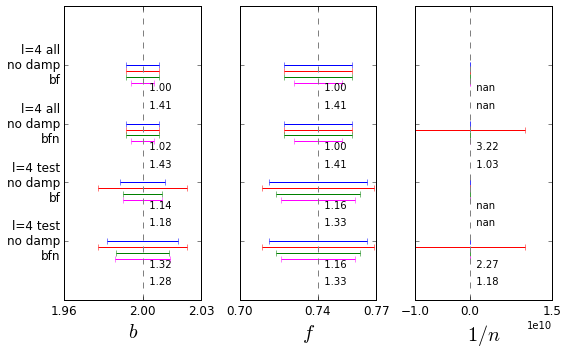

In [475]:
labels = [
          'l=4 all\nno damp\nbf',
          'l=4 all\nno damp\nbfn',
          'l=4 test\nno damp\nbf',
          'l=4 test\nno damp\nbfn'
         ]

filenames = [
             'data_txt/default_kN500_ke-3_rN180_re-3_bfsn_nodp_fisher_params_nn.txt',
             'data_txt/default_kN500_ke-3_rN180_re-3_bfn_nodp_fisher_params_nn.txt',
             #'data_txt/default_kN500_ke-3_rN180_re-3_bfsn_p0_nodp_fisher_params_nn.txt'
             'data_txt/test_bf_k0_02_kN500_r18_180_rN162_nodp_fisher_params_nn.txt',
             'data_txt/test_bfn_k0_02_kN500_r18_180_rN162_nodp_fisher_params_nn.txt',
             #'data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt'
              ]

plot_errbar(filename = filenames, labels = labels, 
            params_names = [r'$b$', r'$f$', r'$1/n$'], 
            truth = [2, 0.74, 1e4/3.],
            out_name='figure/errorbar_bfsn.png')


titles = [['all scales', 'all scales'], ['Greib et al. (2016)', 'Sanchez et al. (2016)'],
         ['Greib et al. (2016)', 'Satpathy et al. (2016)'], ['test scales', 'Sanchez et al. (2016)']]
ranges = [['0 < k < 2','0 < r < 200'], ['0 < k < 0.25','20 < r < 160'],
         ['0 < k < 0.25','25 < r < 150'], ['0 < k < 0.2','20 < r < 160']]

#plot_table(filename = filenames, labels = labels, titles = titles, ranges = ranges)

               b_p     f_p     b_xi     f_xi     joint    joint2
----------------------------------------------------------------
default       192.194    516.704    -       -       160.830   430.700   123.500   331.400
default       -        -       162.162   434.392   160.830   430.700
----------------------------------------------------------------
default       9.563    26.120    -       -       9.510   25.779   6.748   18.370
default       -        -       9.526   25.846   9.510   25.779
----------------------------------------------------------------
default       9.458    26.025    -       -       9.398   25.674   6.671   18.298
default       -        -       9.412   25.739   9.398   25.674
----------------------------------------------------------------
fig save to  figure/errorbar_bfsn.png


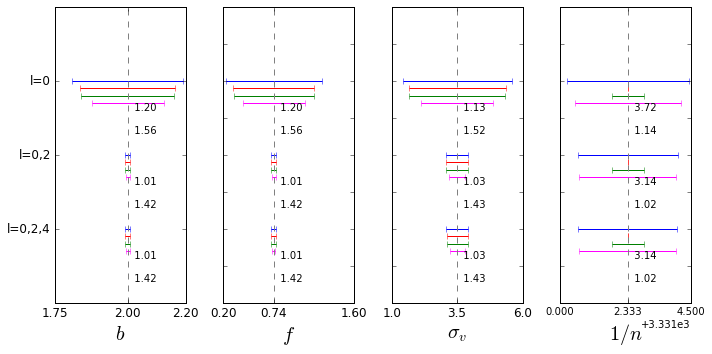

In [317]:
labels = ['l=0',
          'l=0,2',
          'l=0,2,4',
          #'l=0,2,4\nno damp\nbfsn',
          #'l=0,2,4\nno damp\nbfn'
          #'l=0/no damp'
         ]

filenames = ['data_txt/default_kN500_ke-3_rN180_re-3_bfsn_p0_fisher_params_nn.txt',
             'data_txt/default_kN500_ke-3_rN180_re-3_bfsn_p2_fisher_params_nn.txt',
             'data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params_nn.txt',
             #'data_txt/default_kN500_ke-3_rN180_re-3_bfsn_nodp_fisher_params_nn.txt',
             #'data_txt/default_kN500_ke-3_rN180_re-3_bfn_nodp_fisher_params_nn.txt'
             #'data_txt/default_kN500_ke-3_rN180_re-3_bfsn_p0_nodp_fisher_params_nn.txt'
             #'data_txt/test_bf_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt',
             #'data_txt/test_bfs_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt',
             #'data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt'
              ]

plot_errbar(filename = filenames, labels = labels, out_name='figure/errorbar_bfsn.png', nn=1)


titles = [['all scales', 'all scales'], ['Greib et al. (2016)', 'Sanchez et al. (2016)'],
         ['Greib et al. (2016)', 'Satpathy et al. (2016)'], ['test scales', 'Sanchez et al. (2016)']]
ranges = [['0 < k < 2','0 < r < 200'], ['0 < k < 0.25','20 < r < 160'],
         ['0 < k < 0.25','25 < r < 150'], ['0 < k < 0.2','20 < r < 160']]

#plot_table(filename = filenames, labels = labels, titles = titles, ranges = ranges)

               b_p     f_p     b_xi     f_xi     joint    joint2
----------------------------------------------------------------
default       9.563    26.120    -       -       9.510   25.779   6.748   18.370
default       -        -       9.526   25.846   9.510   25.779
----------------------------------------------------------------
test          78.112    230.511    -       -       23.737   74.466   59.112   172.524
test          -        -       341.651   929.952   23.737   74.466


plot_error.py:363: RuntimeWarning: invalid value encountered in double_scalars
  (sigma_v[j][0]/sigma_v[j][2]), (sigma_n[j][0]/sigma_n[j][2])]
plot_error.py:366: RuntimeWarning: invalid value encountered in double_scalars
  (sigma_v[j][0]/sigma_v[j][3]),(sigma_n[j][0]/sigma_n[j][3])]


----------------------------------------------------------------
test          3199.806    8801.424    -       -       354.842   968.666   616.572   1697.648
test          -        -       800.349   2224.187   354.842   968.666
----------------------------------------------------------------
test          3791.733    10423.449    -       -       540.618   1483.282   648.898   1790.176
test          -        -       800.349   2224.187   540.618   1483.282
----------------------------------------------------------------
fig save to  figure/errorbar_bfsn.png


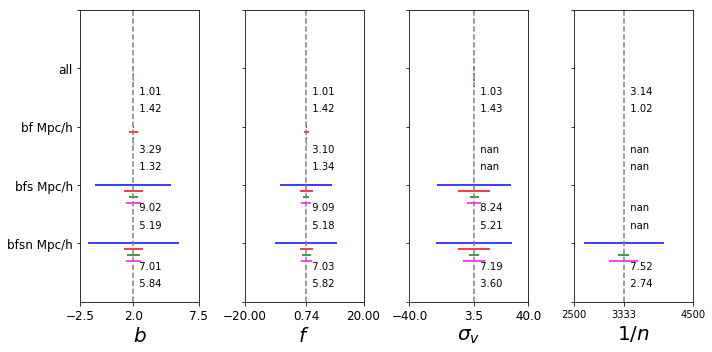

In [94]:
labels = ['all',
          'bf Mpc/h',
          'bfs Mpc/h',
          'bfsn Mpc/h'
         ]

filenames = ['data_txt/default_kN500_ke-3_rN180_re-3_bfsn_p2_fisher_params_nn.txt',
             'data_txt/test_bf_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt',
             'data_txt/test_bfs_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt',
             'data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt'
              ]

plot_errbar(filename = filenames, labels = labels, out_name='figure/errorbar_bfsn.png', nn=1)


titles = [['all scales', 'all scales'], ['Greib et al. (2016)', 'Sanchez et al. (2016)'],
         ['Greib et al. (2016)', 'Satpathy et al. (2016)'], ['test scales', 'Sanchez et al. (2016)']]
ranges = [['0 < k < 2','0 < r < 200'], ['0 < k < 0.25','20 < r < 160'],
         ['0 < k < 0.25','25 < r < 150'], ['0 < k < 0.2','20 < r < 160']]

#plot_table(filename = filenames, labels = labels, titles = titles, ranges = ranges)

               b_p     f_p     b_xi     f_xi     joint    joint2
----------------------------------------------------------------
test          2.696    6.836    -       -       0.176   1.586   0.171   2.397
test          -        -       0.172   2.731   0.176   1.586
----------------------------------------------------------------
default       9.563    26.120    -       -       9.510   25.779   6.748   18.370
default       -        -       9.526   25.846   9.510   25.779
----------------------------------------------------------------
test          78.112    230.511    -       -       23.737   74.466   59.112   172.524
test          -        -       341.651   929.952   23.737   74.466
----------------------------------------------------------------
test          3199.806    8801.424    -       -       354.842   968.666   616.572   1697.648
test          -        -       800.349   2224.187   354.842   968.666
----------------------------------------------------------------
test       

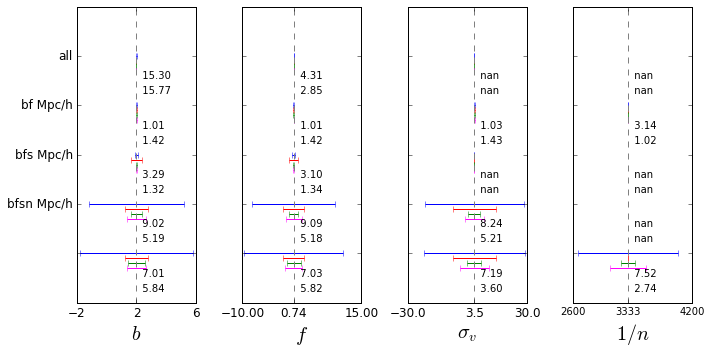

In [336]:
labels = ['all',
          'bf Mpc/h',
          'bfs Mpc/h',
          'bfsn Mpc/h'
         ]

filenames = ['data_txt/test_bf_k0_02_kN500_r18_180_rN162_largen_fisher_params_nn.txt',
             'data_txt/default_kN500_ke-3_rN180_re-3_bfsn_p2_fisher_params_nn.txt',
             'data_txt/test_bf_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt',
             'data_txt/test_bfs_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt',
             'data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_p0_fisher_params_nn.txt'
              ]

plot_errbar(filename = filenames, labels = labels, out_name='figure/errorbar_bfsn.png', nn=1)


titles = [['all scales', 'all scales'], ['Greib et al. (2016)', 'Sanchez et al. (2016)'],
         ['Greib et al. (2016)', 'Satpathy et al. (2016)'], ['test scales', 'Sanchez et al. (2016)']]
ranges = [['0 < k < 2','0 < r < 200'], ['0 < k < 0.25','20 < r < 160'],
         ['0 < k < 0.25','25 < r < 150'], ['0 < k < 0.2','20 < r < 160']]

#plot_table(filename = filenames, labels = labels, titles = titles, ranges = ranges)

In [ ]:
#checking 2 the ratio of shotnoise term and total amplitude

In [227]:
covPP = np.genfromtxt('data_txt/cov/test_bfsn_k0_02_kN500_r18_180_rN162_PP.cov')
covXi = np.genfromtxt('data_txt/cov/test_bfsn_k0_02_kN500_r18_180_rN162_Xi.cov')
covPXi = np.genfromtxt('data_txt/cov/test_bfsn_k0_02_kN500_r18_180_rN162_PXi.cov')

kmax = 1.0

covPP = masking(RSDPower, covPP, kmin=kmin, kmax=kmax, lmax=lmax)
covXi = masking(RSDPower, covXi, xi=True, lmax=lmax)
covPXi = masking(RSDPower, covPXi, kmin = kmin, kmax = kmax, lmax=lmax)

covPP_N = np.genfromtxt('data_txt/cov/test_bfsn_k0_02_kN500_r18_180_rN162_shotnoise_PP.cov')
covXi_N = np.genfromtxt('data_txt/cov/test_bfsn_k0_02_kN500_r18_180_rN162_shotnoise_Xi.cov')
covPXi_N = np.genfromtxt('data_txt/cov/test_bfsn_k0_02_kN500_r18_180_rN162_shotnoise_PXi.cov')

covPP_N = masking(RSDPower, covPP_N, kmin=kmin, kmax=kmax, lmax=lmax)
covXi_N = masking(RSDPower, covXi_N, xi=True, lmax=lmax)
covPXi_N = masking(RSDPower, covPXi_N, kmin = kmin, kmax = kmax, lmax=lmax)
#params_datav_p = np.genfromtxt('data_txt/datav/test_bfsn_k0_02_kN500_r18_180_rN162_params.datavector')
#params_datav_xi = np.genfromtxt('data_txt/datav/test_bfsn_k0_02_kN500_r18_180_rN162_params_xi.datavector')

In [228]:
Prr = covPP_N.diagonal()/covPP.diagonal()
Xirr = covXi_N.diagonal()/covXi.diagonal()
m1, m2 = np.mgrid[0:Prr.size, 0:Xirr.size]
Prrm = Prr[m1]
Xirrm = Xirr[m2]
PXirr_exp = np.sqrt(Prrm * Xirrm)

PXirrm = covPXi_N / covPXi

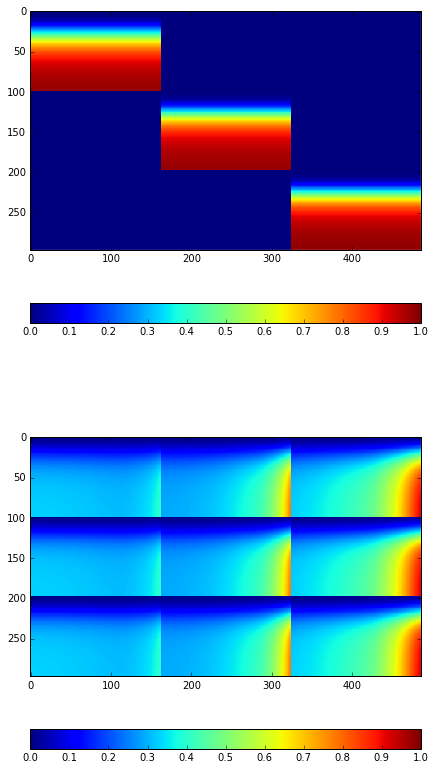

In [234]:
fig, (ax, ax2) = plt.subplots(2,1, figsize = (7,14))
im = ax.imshow(PXirrm, interpolation = 'none',vmin=0, vmax = 1  )
im2 = ax2.imshow(PXirr_exp, interpolation = 'none', vmin=0, vmax = 1 )
fig.colorbar(im, ax = ax,  orientation = 'horizontal')
fig.colorbar(im2, ax = ax2,  orientation = 'horizontal')

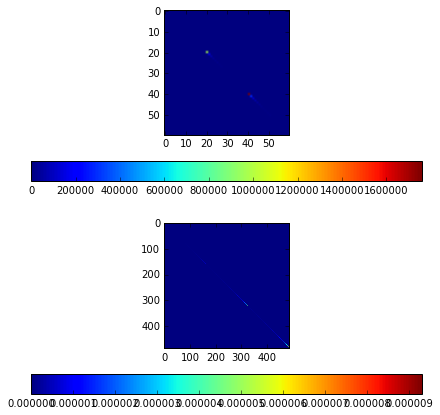

In [222]:
fig, (ax, ax2) = plt.subplots(2,1, figsize = (7,7))
im = ax.imshow(covPP_N )
im2 = ax2.imshow(covXi_N)
fig.colorbar(im, ax = ax,  orientation = 'horizontal')
fig.colorbar(im2, ax = ax2,  orientation = 'horizontal')

In [424]:
covP = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfsn_PP.cov')
covX = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfsn_Xi.cov')
#kcenter = np.genfromtxt('data_txt/snr/default_kN500_ke-3_rN180_re-3_bfsn_snr_p')[:,0]
kcenter = np.genfromtxt('data_txt/kcenter.txt')
rcenter = np.genfromtxt('data_txt/rcenter.txt')

In [416]:
DAT = np.column_stack((kcenter, covP.diagonal()[:kcenter.size]))
np.savetxt('data_txt/covpp0.txt', DAT)

DAT = np.column_stack(( rcenter, covX.diagonal()[:rcenter.size] ))
np.savetxt('data_txt/covxi0_diag.txt', DAT)
np.savetxt('data_txt/covxi.txt', covX[:rcenter.size, :rcenter.size])

In [402]:
kcenter[0]

0.00022522530015015011

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


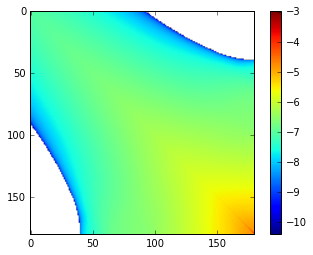

In [417]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(covX[:rcenter.size, :rcenter.size]))
fig.colorbar(im, ax=ax)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


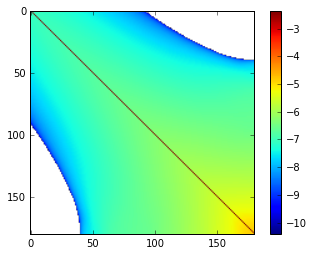

In [413]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(covX[:rcenter.size, :rcenter.size]))
fig.colorbar(im, ax=ax)

In [ ]:
covXSN = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfsn_Xi.cov')

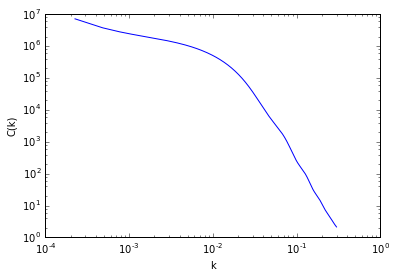

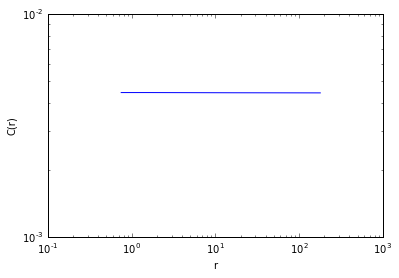

In [425]:
kcenter = np.genfromtxt('data_txt/kcenter.txt')
fig, ax = plt.subplots()
ax.loglog(kcenter, covP.diagonal()[:kcenter.size])
ax.set_xlabel('k')
ax.set_ylabel('C(k)')

fig, ax = plt.subplots()
ax.loglog(rcenter, covX.diagonal()[:rcenter.size])
ax.set_xlabel('r')
ax.set_ylabel('C(r)')

In [423]:
covX.diagonal()[:rcenter.size]

array([ 0.00444453,  0.00444453,  0.00444453,  0.00444453,  0.00444453,
        0.00444454,  0.00444454,  0.00444454,  0.00444454,  0.00444454,
        0.00444454,  0.00444454,  0.00444454,  0.00444454,  0.00444455,
        0.00444455,  0.00444455,  0.00444455,  0.00444455,  0.00444455,
        0.00444455,  0.00444456,  0.00444456,  0.00444456,  0.00444456,
        0.00444456,  0.00444456,  0.00444457,  0.00444457,  0.00444457,
        0.00444457,  0.00444457,  0.00444457,  0.00444458,  0.00444458,
        0.00444458,  0.00444458,  0.00444458,  0.00444459,  0.00444459,
        0.00444459,  0.00444459,  0.0044446 ,  0.0044446 ,  0.0044446 ,
        0.0044446 ,  0.00444461,  0.00444461,  0.00444461,  0.00444461,
        0.00444462,  0.00444462,  0.00444462,  0.00444463,  0.00444463,
        0.00444463,  0.00444463,  0.00444464,  0.00444464,  0.00444465,
        0.00444465,  0.00444465,  0.00444466,  0.00444466,  0.00444467,
        0.00444467,  0.00444467,  0.00444468,  0.00444468,  0.00

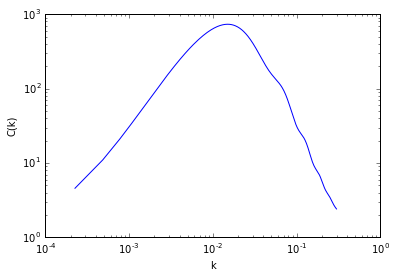

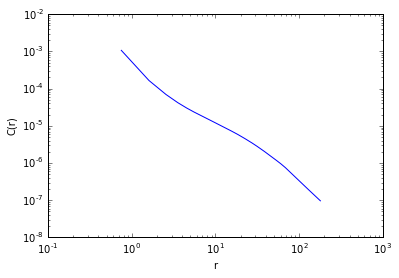

In [418]:
kcenter = np.genfromtxt('data_txt/kcenter.txt')
fig, ax = plt.subplots()
ax.loglog(kcenter, covP.diagonal()[:kcenter.size])
ax.set_xlabel('k')
ax.set_ylabel('C(k)')

fig, ax = plt.subplots()
ax.loglog(rcenter, covX.diagonal()[:rcenter.size])
ax.set_xlabel('r')
ax.set_ylabel('C(r)')

In [31]:
dxidn_datav[3,:rcenter.size]

array([  1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,   1.00000000e-30,   1.00000000e-30,
         1.00000000e-30,

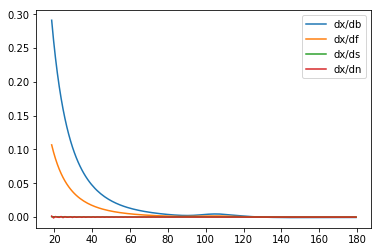

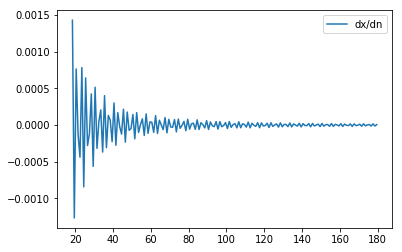

In [32]:
dxidn_datav = np.genfromtxt('data_txt/datav/test_bfsn_k0_02_kN500_r18_180_rN162_params_xi.datavector')
rcenter = np.genfromtxt('data_txt/rcenter.txt')
#dxidn_datav[3,:rcenter.size]

#dxidn_datav = np.genfromtxt('data_txt/datav/test_bf_k0_02_kN500_r18_180_rN162_params_xi.datavector')
#rlist, dr = np.linspace(18, 180, 163, retstep = True)
fig, ax = plt.subplots()
ax.plot(rcenter, dxidn_datav[0,:rcenter.size], label='dx/db')
ax.plot(rcenter, dxidn_datav[1,:rcenter.size], label='dx/df')
ax.plot(rcenter, dxidn_datav[2,:rcenter.size], label='dx/ds')
ax.plot(rcenter, dxidn_datav[3,:rcenter.size], label='dx/dn')
ax.legend(loc='best')
fig, ax = plt.subplots()
#ax.plot(rlist, dxidn_datav[2,:rlist.size], label='dx/ds')
ax.plot(rcenter, dxidn_datav[3,:rcenter.size], label='dx/dn')
ax.legend(loc='best')

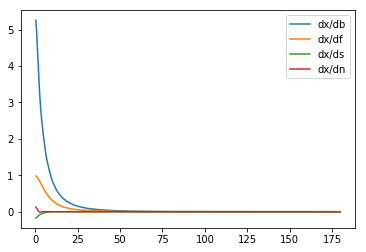

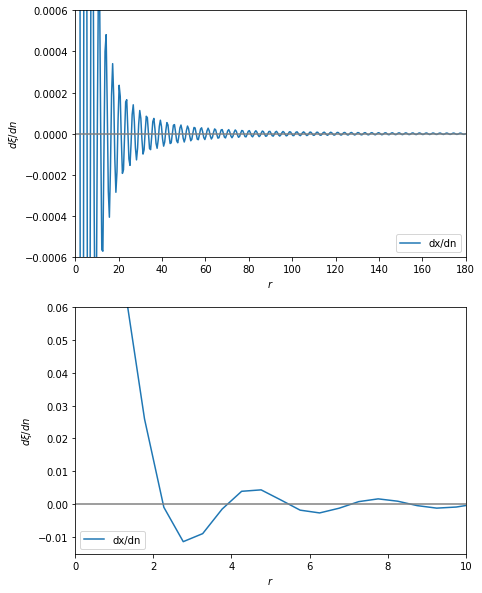

In [93]:
dxidn_datav = np.genfromtxt('data_txt/datav/default_kN500_ke-3_rN180_re-3_bfsn_params_xi.datavector')
rcenter = np.genfromtxt('data_txt/rcenter.txt')
#dxidn_datav[3,:rcenter.size]

#dxidn_datav = np.genfromtxt('data_txt/datav/test_bf_k0_02_kN500_r18_180_rN162_params_xi.datavector')
#rlist, dr = np.linspace(18, 180, 163, retstep = True)
fig, ax = plt.subplots()
ax.plot(rcenter, dxidn_datav[0,:rcenter.size], label='dx/db')
ax.plot(rcenter, dxidn_datav[1,:rcenter.size], label='dx/df')
ax.plot(rcenter, dxidn_datav[2,:rcenter.size], label='dx/ds')
ax.plot(rcenter, dxidn_datav[3,:rcenter.size], label='dx/dn')
ax.legend(loc='best')


fig, (ax, ax2) = plt.subplots(2,1, figsize = (7,10))
#ax.plot(rlist, dxidn_datav[2,:rlist.size], label='dx/ds')
ax.plot(rcenter, dxidn_datav[3,:rcenter.size], label='dx/dn')
ax.axhline(y=0, color='grey')
ax.set_ylim(-6e-4, 6e-4)
ax.legend(loc='best')
ax.set_xlim(0,180)
ax.set_ylabel(r'$d\xi/dn$')
ax.set_xlabel(r'$r$')

#ax.plot(rlist, dxidn_datav[2,:rlist.size], label='dx/ds')
ax2.plot(rcenter, dxidn_datav[3,:rcenter.size], label='dx/dn')
ax2.axhline(y=0, color='grey')
ax2.set_xlim(0,10)
ax2.set_ylim(-0.015, 0.06)
ax2.set_ylabel(r'$d\xi/dn$')
ax2.set_xlabel(r'$r$')
ax2.legend(loc='best')

In [66]:
dxidn_datav[3,:]

array([ -1.36696949e-05,   3.50718884e-06,   1.58236632e-05, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])